In [3]:
import pandas as pd


----
Reading .csvs downloaded from https://www.tsb.gc.ca/eng/stats/rail/data-5.html  
### Occurrence  
This table contains the following types of data:

- Occurrence summary data, including a brief description of the occurrence.
- Notification data, including the date and time that the occurrence was reported.
- Track infrastructure data, including track type, owner of the track, and track inspection history.
- Rail data, including rail type, metallurgy, manufacturer, date installed, rail wear, and rail defects.
- Tie plates / turnout data, including tie plate type, track fastener type, tie size, number of ties, turnout/switch type, and turnout installation date.
- Track geometry data, including track curvature, gradient, ballast type, subgrade type, shoulder width, and track structure type.
- Environmental conditions data, including temperature, wind, precipitation, sky condition, visibility obstructions, and ground conditions.
- Area evacuation data, including number of people evacuated, who initiated the evacuation, agencies involved, isolation radius, and emergency response - information.
- Crossing accident data, including crossing location, crossing type, impact type, daily train traffic, daily vehicle traffic, angle of crossing, sightline information, gradient of crossing, road speed, and other protection (e.g., whistling, flagman).
- Grade crossing warning system (GCWS) data, including status of GCWS, special features, design speed, and GCWS test date.
- Vehicle data, including number of vehicles, action of the vehicle driver, number of occupants in the vehicle, visibility at the crossing for the vehicle driver, and any dangerous goods carried in the vehicle

### Train  
This table contains the following types of data:

- Train data, including train type, train operator, train speed, method of train control, number of cars, train length, and train weight.
- Train operation data, including authorized speed, signal indication, method of main track authorization, movement control type, event recorder indicators, and crew assignment origin/destination.
- Signals data, including signal number, signal type, signal application, and details on wayside devices.

### Rolling stock

This table contains the following types of data

- Rolling stock data, including rolling stock type, position in the train, derailed indicator, car load status, dangerous goods indicator, and fuel lost from locomotive.
- Rolling stock details data, including sill type, brake beam type, handbrake type, draft gear type, axle size, wheel type, and car inspection details.
- Cargo data, including product name, quantity carried, products released, release location on car, release type, release quantity, and tank car test dates.
- Crashworthiness data, including construction material, location of damage, decrease in internal volume, position of the derailed rolling stock, and evacuation/egress from the rolling stock.

### Injuries  
This table contains the following types of data:

- Injuries (On-train) data, including injuries and/or fatalities for people who were on the train.
- Injuries (Off-train) data, including injuries and/or fatalities for people who were NOT on the train.

### Track and Rolling stock components  

This table contains data on various track components and rolling stock components, including manufacturer, model/part information, date of manufacturing, and date of last overhaul.

In [6]:
# compoents not used
# train used
# occurrences used
# rolling stock not used
# injuries not used

In [7]:
df_occurrences = pd.read_csv('../TC_Data/RODSdb_MDOTW_VW_OCCURRENCE_PUBLIC.csv',low_memory=False)
df_train = pd.read_csv('../TC_Data/RODSdb_MDOTW_VW_TRAIN_PUBLIC.csv',low_memory=False)
df_rolling_stock = pd.read_csv('../TC_Data/RODSdb_MDOTW_VW_ROLLING_STOCK_PUBLIC.csv',low_memory=False)
df_injuries = pd.read_csv('../TC_Data/RODSdb_MDOTW_VW_INJURIES_PUBLIC.csv',low_memory=False)
df_components = pd.read_csv('../TC_Data/RODSdb_MDOTW_VW_COMPONENTS_PUBLIC.csv',low_memory=False)

###########
# reading the csv that has the discription of the columns in the csvs
# was getting this error ' 'utf-8' codec can't decode byte 0x93 in position 47142: invalid start byte'
df_disc = pd.read_csv('../TC_Data/RODSdb-dd.csv',encoding='unicode_escape')

### Grade crossing dataset and data dictionary
Source: https://open.canada.ca/data/en/dataset/d0f54727-6c0b-4e5a-aa04-ea1463cf9f4c

In [8]:
df_gc_dd = pd.read_excel('../TC_Data/grade_crossing_inventory_data_dictionary.xls')
df_gc = pd.read_excel('../TC_Data/grade_crossings_inventory_-_rail_safety_dataset_en.xlsx')

### EDA

In [9]:
accident_count = df_gc['Accident'].astype(int)
accident_count.value_counts()

0    24557
1      551
2       41
3        5
4        1
Name: Accident, dtype: int64

In [10]:
df_occurrences['AccIncTypeID_DisplayEng'].value_counts()
df_crossing = df_occurrences[df_occurrences['AccIncTypeID_DisplayEng']=='CROSSING']
df_crossing

,OccID,OccNo,OccClassID,OccClassID_DisplayEng,OccClassID_DisplayFre,OccDate,OccYear,OccTime,TimeZoneID,TimeZoneID_DisplayEng,...,SignConditionID_DisplayEng,SignConditionID_DisplayFre,PointOfEntryID,PointOfEntryID_DisplayEng,PointOfEntryID_DisplayFre,DistanceToCrossing_Miles,TrespasserVehicleInvolvedInd,TrespasserVehicleTypeID,TrespasserVehicleTypeDisplayEng,TrespasserVehicleTypeDisplayFre
4,133084,R23E0022,5,5,5,3/8/2023 9:30:00 PM,2023,2130.0,10.0,MST,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,133054,R23T0048,5,5,5,3/2/2023 8:31:00 AM,2023,831.0,2.0,EST,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,133050,R23V0046,5,5,5,2/27/2023 8:00:00 AM,2023,800.0,7.0,PST,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38,133044,R23E0018,5,5,5,2/26/2023 10:40:00 PM,2023,2240.0,10.0,MST,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40,133042,R23E0017,5,5,5,2/26/2023 12:45:00 PM,2023,1245.0,10.0,MST,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66539,27807,R83Q1376,11,NaN,S/O,1/7/1983 12:00:00 AM,1983,1130.0,14.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66549,27797,R83C1575,11,NaN,S/O,1/3/1983 12:00:00 AM,1983,1110.0,14.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66550,27796,R83M0558,11,NaN,S/O,1/3/1983 12:00:00 AM,1983,1552.0,14.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66551,27795,R83M0557,11,NaN,S/O,1/2/1983 12:00:00 AM,1983,1415.0,14.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df_occurrences['OccDate'] = pd.to_datetime(df_occurrences['OccDate'])

In [12]:
df_occurrences['Year'] = df_occurrences['OccDate'].dt.year
df_occurrences['Month']= df_occurrences['OccDate'].dt.month

In [13]:
# looking at the past 20 years

year_set = set()
for i in range(2010,2023):
    year_set.add(i)
df_occurrences['Count'] = 1
df_count = df_occurrences[df_occurrences['Year'].isin(year_set)]

<AxesSubplot: xlabel='Year'>

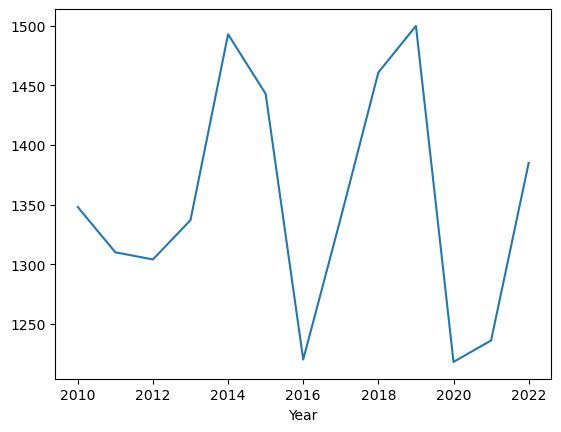

In [14]:
# quick plot to show number of accidents in the last 20 years
year_groupby = df_count.groupby(by='Year').count()
year_groupby['Count'].plot()


Examining the csvs i found that the grade crossing data set nd the occurrence dataset have a key that can tie them together (TC number)

In [15]:
# renaming so i can merge them
df_crossing['TC Number'] = df_crossing['TCNo']

C:\Users\Cian-work\AppData\Local\Temp\ipykernel_2196\1823827256.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_crossing['TC Number'] = df_crossing['TCNo']


In [16]:
df_crossing['TC Number'] = df_crossing['TC Number'].astype(str)
df_gc['TC Number'] = df_gc['TC Number'].astype(str)

C:\Users\Cian-work\AppData\Local\Temp\ipykernel_2196\968878244.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_crossing['TC Number'] = df_crossing['TC Number'].astype(str)


### merging 

In [17]:
df_crossing_with_grade = pd.merge(df_crossing,df_gc,how='left',on=['TC Number','TC Number'])

Examinging potential features to see how many nulls are in present

In [18]:
df_crossing_with_grade['Trains Daily'].isnull().sum()

3109

In [19]:
df_train['TrainOperatorID'].isnull().sum()
# keep

434

In [20]:
df_train['MaxSubSpeed_MPH'].isnull().sum()
# drop

48170

In [21]:
df_train['ApproxTrainSpeed_MPH'].isnull().sum()
# drop

11638

In [22]:
df_train['MethodTrainControlID'].isnull().sum()
# drop

36146

In [23]:
df_train['NumCars'].isnull().sum()
# drop

17973

In [24]:
df_train['TrainLength_Feet'].isnull().sum()
# really wanted this one
# drop

22524

In [25]:
df_train['TrainTonnage'].isnull().sum()
# might keep

7707

In [26]:
def remove_duplicates_from_list(a_list):
    '''pass in a list
    return a list with duplicates removed'''
    return list(dict.fromkeys(a_list))

In [27]:
########################
# This is only from the Train, Occ, etc DFs not the GC dfs
# After examining the csvs and the 700 potential features present i created a list
# These are the initial set of features which might prove useful

intial_feature_list=['AccIncTypeID','AccIncTypeID_DisplayEng','CarLoadStatusID','CarLoadStatusID_DisplayEng',
                     'CollisionAfterDerailIND','CollistionTypeID','CollistionTypeID_DisplayEng','LastOverhaulDate',
                     'Latitude','Longitude','ManufacturedDate','Manufacturer','Model','NumberTrainsInvolved','OccDate',
                     'OccID','OccID','OccID','OccID','OccID','OccNo','OccNo','OccNo','OccNo','OccNo','OccurrenceTypeID',
                     'OccurrenceTypeID_DisplayEng','PartNameID','PartNameID_DisplayEng','RegionOfOccurrence',
                     'RegionOfOccurrence_DisplayEng','RiskOfCollisionIND','RollingStock','RollingStock','RollingStockTypeID',
                     'RollingStockTypeID_DisplayEng','SUBD_OWNER_ABBREV_ENG','SubdEndMileage','SubdMileage','SubdNameID',
                     'SubdNameID_DisplayEng','SubdOwnerID','SubdOwnerID_DisplayEng','SubdStartMileage','Summary',
                     'SuspectedComponentFailureIND','TimetableDirID','TimetableDirID_DisplayEng','TrackTypeID',
                     'TrackTypeID_DisplayEng','TrainOperatorID','TrainOperatorID_DisplayEng','YardNameID',
                     'YardNameID_DisplayEng','YardOwnerID','YardOwnerID_DisplayEng','YardTypeID','YardTypeID_DisplayEng',]

In [28]:
# removing duplicates
intial_feature_list = remove_duplicates_from_list(intial_feature_list)
# adding all the columns from the grade crossing inventory
gc_cols = list(df_gc.columns.values)
# adding all those features to the initial feature list
intial_feature_list = intial_feature_list+gc_cols

In [29]:
# dropping around 1000 rows that don't have a suitable TC Number
df_crossing_with_grade['TC Number'] = df_crossing_with_grade['TC Number'].apply(pd.to_numeric, errors='coerce')
df_dropped = df_crossing_with_grade.dropna(subset=['TC Number'])

In [30]:
df_dropped = df_dropped.filter(intial_feature_list)

In [31]:
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12253 entries, 0 to 13340
Data columns (total 55 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   AccIncTypeID                   12253 non-null  int64  
 1   AccIncTypeID_DisplayEng        12253 non-null  object 
 2   CollisionAfterDerailIND        3213 non-null   float64
 3   CollistionTypeID               1 non-null      float64
 4   CollistionTypeID_DisplayEng    1 non-null      object 
 5   NumberTrainsInvolved           12249 non-null  float64
 6   OccDate                        12253 non-null  object 
 7   OccID                          12253 non-null  int64  
 8   OccNo                          12253 non-null  object 
 9   OccurrenceTypeID               12253 non-null  int64  
 10  OccurrenceTypeID_DisplayEng    12253 non-null  object 
 11  RegionOfOccurrence             12253 non-null  float64
 12  RegionOfOccurrence_DisplayEng  8580 non-null  

In [32]:
accident_count = df_gc['Accident'].astype(int)
accident_count.value_counts()
df_occurrences['AccIncTypeID_DisplayEng'].value_counts()

NON-MAIN-TRACK TRAIN DERAILMENT                                19227
CROSSING                                                       13344
DG LEAKER                                                       8084
MAIN-TRACK TRAIN DERAILMENT                                     6807
NON-MAIN-TRACK TRAIN COLLISION                                  4242
MOVEMENT EXCEEDS LIMITS OF AUTHORITY                            3552
TRESPASSER                                                      3400
FIRE ON-BOARD R/S                                               1118
COLLISION INVOLVING TRACK UNIT                                   922
NON-MAIN-TRACK TRAIN DERAILMENT (NO DAMAGE)                      819
R/S COLL. WITH OBJECT                                            596
R/S DAMAGE WITHOUT DERAIL./COLL.                                 563
HISTORICAL                                                       563
EMPLOYEE                                                         544
MAIN-TRACK TRAIN COLLISION        